In [1]:
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data 
df = pd.read_csv('../data/cleaned_heart_disease.csv')
x= df.drop('num', axis=1)
y = df['num']

In [3]:
#method 1 :random forest feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)
feature_importance =pd.DataFrame({
    'feature':x.columns,
    'importance' :rf.feature_importances_
}).sort_values('importance', ascending=False)



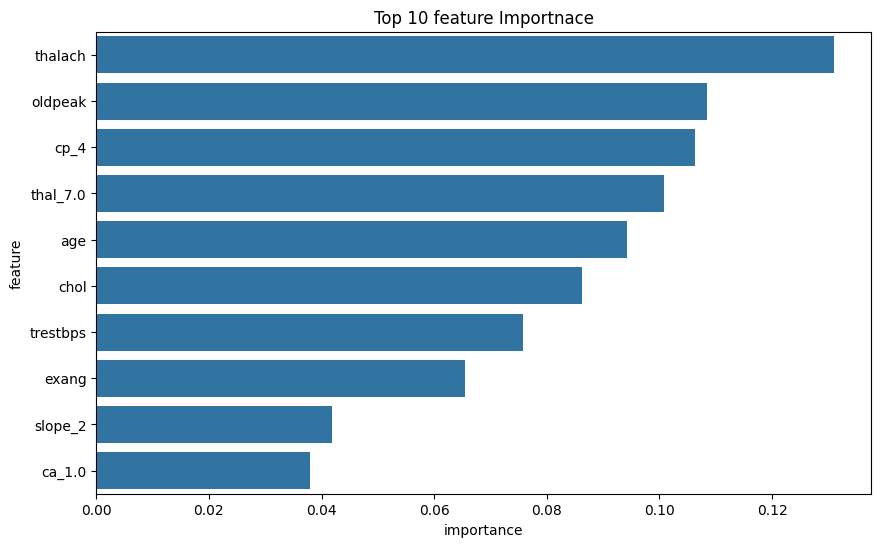

In [4]:
#plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(data = feature_importance.head(10), x ='importance', y ='feature')
plt.title('Top 10 feature Importnace')
plt.savefig('../results/feature_importance.png')

In [5]:
#method 2 : recursive feature elimination
rfe = RFE(estimator=rf, n_features_to_select=10)
X_rfe = rfe.fit_transform(x, y)
selected_feature_rfe = x.columns[rfe.support_]


In [6]:
# Replace StandardScaler with MinMaxScaler for Chi-Square
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()  # Scales to [0,1] range
X_minmax = minmax_scaler.fit_transform(x)
X_minmax_df = pd.DataFrame(X_minmax, columns=x.columns)

# Now apply Chi-Square (all values 0-1)
chi2_selector = SelectKBest(chi2, k=10)
X_chi2 = chi2_selector.fit_transform(X_minmax_df, y)
selected_features_chi2 = X_minmax_df.columns[chi2_selector.get_support()]  


In [7]:
#combine the three methods
final_features = list(set(selected_feature_rfe) & set(selected_features_chi2))
X_selected = x[final_features]

In [8]:
#save selected featuers
selected_df =X_selected.copy()
selected_df['num']= y
selected_df.to_csv('../data/feature_selected.csv', index=False)



In [9]:
#save feature names
joblib.dump(final_features, '../models/selected_features.pkl')

['../models/selected_features.pkl']